### Remarques
1. Nous sommes dans un cas paramagnétique.
2. Attention pê développement multipolaire?
3. A cause du coeur supraconducteur, le champ magnéique sera moins intense!
4. $ \mathbf{\nabla} \times \mathbf{B} = \mu \mathbf{J}$ dans le cas paramagnétique!
5. Le champ n'est pas toujours uniforme, même si ce cas semble s'apparenter à un solénoïde!
6. Voir leçons 4_3, 4_4 et pê 3_4
7. Il faut déterminer le moment où le champ B sera uniforme (condition d'arrêt du code).
8. Condition initiale pour B? B_0 = mu
9. Ne peut-on pas considérer cette brusque apparition de B comme une sorte de choc?
10. Exploiter les symétries?
11. Stabilité!! 
12. N'y a-t-il pas une durée pendant laquelle le conducteur n'est plus à l'équilibre? Donc E à l'intérieur toujours nul? Pris en compte par Faraday
13. Loi de Faraday pendant ce temps? La négliger puisque le changement semble instantané? Déjà prise en compte!

## Equation de diffusion du champ magnétique

En reprenant les équations de Maxwell suivantes, nous pouvons montrer que le champ magnétique $\mathbf{B}$ obéit à une équation de diffusion. En se rappelant la loi d'Ohm $\mathbf{J} = \sigma \mathbf{E}$,
$$\nabla \times {\bf E} = -\partial_t {\bf B}\\
\nabla \times {\bf B} =\mu {\bf J}\\
\nabla \cdot {\bf B}=0
$$
ensuite en subsituant $\mathbf{E}$ par $\dfrac{\mathbf{J}}{\sigma}$  puis $\mathbf{J}$ par $\dfrac{1}{\mu} \nabla \times {\bf B}$ dans le première équation, et en sachant que $\nabla \times(\nabla \times {\bf B}) = \nabla (\nabla \cdot {\bf B}) - \Delta \mathbf{B} = - \Delta \mathbf{B}$, nous obtenons l'équation de diffusion:
$$ \partial_t \bf{B} - \dfrac{1}{\sigma \mu} \Delta B = 0$$

## Description du problème et conditions aux bords

<img src='./figures/diagram.png' width='400px'>

#### Figure 1: Schéma de la géométrie considérée. Le conducteur est homogène et infini dans la direction z.

La zone sur laquelle nous allons résoudre l'équation diffusion du champ magnétique est la région grisée (ouverte) sur la Figure 1. Comme le problème est symétrique selon z, nous allons résoudre l'équation sur une tranche (bidimentionelle, orthogonale à la direction z) de la région grise. De plus, toujours à cause de la symétrie selon z, tous les courants dans le problème seront toujours de composante z nulle. Par conséquent, le champ magnétique est en tout instant et en tout point orienté selon z et nous allons donc résoudre l'équation pour la composante $B_z = |\mathbf{B}|$ uniquement.

Notons que le bord de la région grisée se sépare en deux parties: les contours des carrés de 0.5 et 1.5cm de côtés (que nous appellerons bords internes et externes, respectivement). Le bord externe est parcouru par un courant total de surface $J=1A/m$, nous pouvons alors calculer le champ magnétique produit dans un voisinage infinitésimal d'un point du bord avec une boucle d'ampère rectangulaire orthogonale au courant, traversée par celui-ci et avec deux côtés de longueur quelconque $L$ orientés selon z et deux côtés de longueur infinitésimale orthogonaux à l'axe z. Nous trouvons: 

$$ B\times L = \oint \mathbf B\cdot d\mathbf l = \iint (\nabla \times \mathbf B) \cdot d\mathbf S = \iint \mu\mathbf J \cdot d\mathbf S = \mu J\times L $$
$$ B = \mu J = \mu \times 1 A/m $$

Ceci donne la valeur du champ magnétique à une distance infitésimalement proche du bord, qui prend donc cette valeur fixe immédiatement après que le courant passe à $1A/m$. Cela nous donne une condition de Dirichlet pour le bord externe.

Concernant le bord interne, nous pouvons nous guider avec l'analogie de la chaleur dans laquelle la composante $B_z$ du champ magnétique est la température. Cette analogie est rigoureuse mathématiquement car dans les deux cas nous avons la même équation pour un champ scalaire. Pour trouver la condition sur le bord interne, il faut remarquer que le supraconducteur est caractérisé par une conductivité électrique infinie et que cela implique que la constante $1/\mu\sigma$ est nulle dans ce milieu. Le champ magnétique conserve donc sa valeur initiale, fixée à $0$, car 
$$ \partial_t \mathbf{B} = \frac{1}{\mu\sigma} \mathbf{\Delta} \mathbf{B} = 0$$
Le supraconducteur se comporte donc comme un isolant thermique dans l'analogie de la chaleur (sa température met un temps infini à augmenter). La condition au bord dans ce cas est que le flux de chaleur vers l'isolant est nul, autrement dit, par la loi de Fourier, que le produit scalaire entre le gradient de la température et la normale au côté du carré est nul sur le bord interne. Nous avons donc la condition de Neumann $(\nabla B)\cdot \mathbf n = 0$ pour le bord interne. Une démonstration immédiate de ce résultat qui n'utilise pas la loi de Fourier peut aussi être faite avec le théorème de flux-divergence et le lemme de Du Bois-Reymond, mais on perd alors l'essence physique du problème.

## Evolution au cours du temps - Méthode d'Euler

In [58]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Il faut implémenter le champ magnétique comme une matrice $N \times (N-M)$.

In [59]:
sigma = 5.96*10**7
mu = 1.26*10**-6

# parametres
T = 0.002
L = 0.015
N = 50

dx = L/N
dt = 1/4*(sigma*mu)*dx**2   # condition de stabilité
nt = int(T/dt)+1
M = int(N/3)+1

print(nt)

B0 = numpy.zeros((N-M+2,N+2))
B0[0,:] = mu*numpy.ones(N+2)

1184


In [60]:
def matrix_extent(B): 
    
    B[:-1,N+1] = B[:-1,N]
    
    for i in range(1,N-M+1):
        
        B[i+1,i] = B[i,i+1]

In [61]:
def evolution(B0, nt, dt, dx):
    
    B = B0.copy()
    
    for n in range(nt):
        
        Bn = B.copy()
        Bn[-1,:] = Bn[-2,:]   # condition de Neumann (dérivée nulle car isolant)
        matrix_extent(B)      # symétrie
        
        for i in range(1,N-M+1):
            for j in range(i,N+1):
                
                B[i,j] = Bn[i,j] + 1/(mu*sigma)*\
                (dt/dx**2 * (Bn[i+1,j] - 2*Bn[i,j] + Bn[i-1,j]) +\
                 dt/dx**2 * (Bn[i,j+1]- 2*Bn[i,j] + Bn[i,j-1]))
                
    return B

In [62]:
B = evolution(B0, nt, dt, dx)
#print(B)

### Visualisation du pavé élémentaire

In [63]:
# retire la sous-diagonale pour visualisation
for i in range (1,N-M+2):
    B[i,i-1] = 0

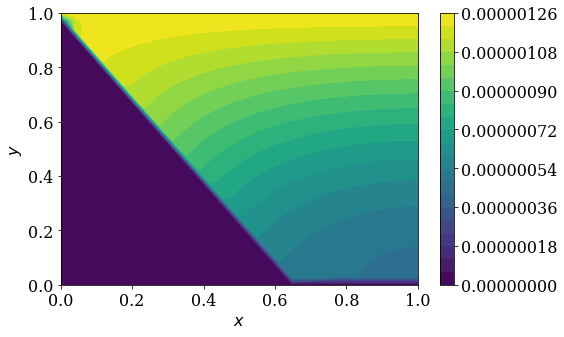

In [64]:
x = numpy.linspace(0,1,N+2)
y = numpy.linspace(1,0,N-M+2)

pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,B,20,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

##  Reconstruction de la figure symétrique et visualisation globale

In [66]:
def recompose(B):
    
    B0 = B.copy()[1:-1,1:-1]  # valeurs qui ont un sens physique
    l = len(B0[0,:])
    k = len(B0[:,0])
    B_complet = numpy.zeros((2*l,2*l))
    
    #agrandir le pavé élémentaire pour avoir une matrice carrée (B1)
    extra = numpy.zeros((l-k,l))
    B1 = numpy.concatenate((B0,extra),axis=0)
    
    #transposer et additionner pour avoir les bonnes valeurs dans le triangle inférieur
    B1_t = numpy.transpose(B1)
    B2 = B1_t + B1
    for i in range(0,l-1):  
        B2[i,i] = B2[i,i]/2
    
    B_complet[0:l,0:l] = B2
    
    #symétrie d'axe Ox 
    B_complet[l::,0:l] = numpy.flipud(B2)
    
    #symétrie d'axe Oy partie haut
    B_complet[0:l,l::] = numpy.fliplr(B2)
    
    #symétrie d'axe Oy partie bas
    B_complet[l::,l::] = numpy.fliplr(B_complet[l::,0:l])
    
    return B_complet

In [67]:
B_complet = recompose(B)

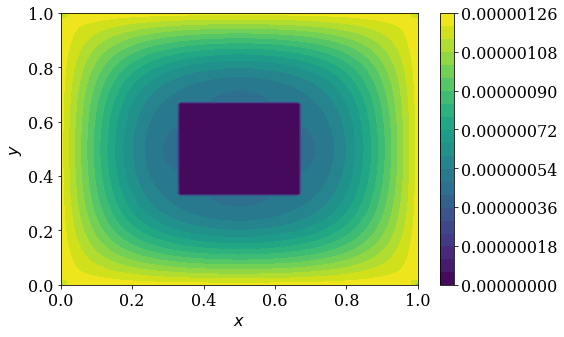

In [68]:
x = numpy.linspace(0,1,2*N)
y = numpy.linspace(1,0,2*N)

pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,B_complet,20,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();